<a href="https://colab.research.google.com/github/EricRaniere/Projetos-Estudos/blob/main/AnaliseAirbnbAmsterdan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![author](https://img.shields.io/badge/author-ericcosta-red.svg)](https://www.linkedin.com/in/eric-raniere-costa) [![](https://img.shields.io/badge/python-3.7+-blue.svg)](https://www.python.org/downloads/release/python-365/) [![GPLv3 license](https://img.shields.io/badge/License-GPLv3-blue.svg)](http://perso.crans.org/besson/LICENSE.html) [![contributions welcome](https://img.shields.io/badge/contributions-welcome-brightgreen.svg?style=flat)](https://github.com/EricRaniere/Projetos-Estudos/tree/main/DSNP)

  <img alt="Colaboratory logo" width="100%" src="https://raw.githubusercontent.com/EricRaniere/Projetos-Estudos/main/Banner.jpg">

---

O [Airbnb](https://news.airbnb.com/about-us/) é hoje a principal plataforma de compartilhamento e oferta de hospedagem do mundo. 

O negócio criado em 2007 é atualmente responsável por **5.6 milhões de anúncios ativos** de hospedagem espalhados por **100.000 cidades** em mais de **220 países**[*](https://news.airbnb.com/about-us/). 

Sua rede hoje conta com mais de **4 milhões de Anfitriões**, pessoas que oferencem seus imóveis na plataforma, gerando uma receita média de **$7.900,00 por ano** para cada Anfitrião. 

Uma das iniciativas mais interessantes do Airbnb é o fato da empresa disponibilizar dados da sua plataforma para fomentar o estudo e desenvolvimento de insights. Os dados disponibilizados são previamente tratados e anonimizados, evitando a quebra de sigilo dos seus usuários. Todos os dados estão públicados na plataforma [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Nesse notebook vou realizar a primeira tarefa do curso **Data Science na Prática** da **[Sigmoidal](https://sigmoidal.ai/)** e analisar os dados da cidade de **Amsterdão**, a idéia é extrair o máximo de insights relevantes sobre a base de dados.




## Obtenção dos Dados


Para a análise exploratória inicial, irei utilizar o seguinte arquivo:

* `listings.csv`
 


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/EricRaniere/Projetos-Estudos/main/DSNP/listings.csv")

## Análise dos Dados
Nessa etapa vou buscar entender como os dados estão estruturados e buscar relacionar a que cada variável esta associada.


* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


In [ ]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,59,3,278,2020-02-14,1.90,1,152
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,200,1,339,2020-04-09,2.50,2,0
2,25428,"Lovely, 1 bed apt in Ctr (w.lift) -3/20-6/20(f...",56142,Joan,NaN,Centrum-West,52.37490,4.88487,Entire home/apt,125,14,5,2020-02-09,0.13,2,132
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,141,2,219,2020-07-25,1.94,1,66
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,75,2,336,2020-09-20,2.59,2,335


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

`listings.csv.gz`

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 17825
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.134642
last_review                       0.134642
host_name                         0.033380
name                              0.001795
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

#### Q2.1 Eliminar colunas com dados totalmente ausentes
Com o comando anterior temos a conclusão de que a coluna `neighbourhood_group`pode ser eliminada do nosso DataSet.

In [ ]:
#criando uma cópia do DF para limpeza. Objetivo de ter um backup.
df_clean=df.copy()
#eliminando a coluna neighbourhood_group, que está totalmente vazia
df_clean.drop('neighbourhood_group',axis=1,inplace=True)
# ordenar novamente em ordem decrescente as variáveis por seus valores ausentes
(df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False)


reviews_per_month                 0.134642
last_review                       0.134642
host_name                         0.033380
name                              0.001795
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

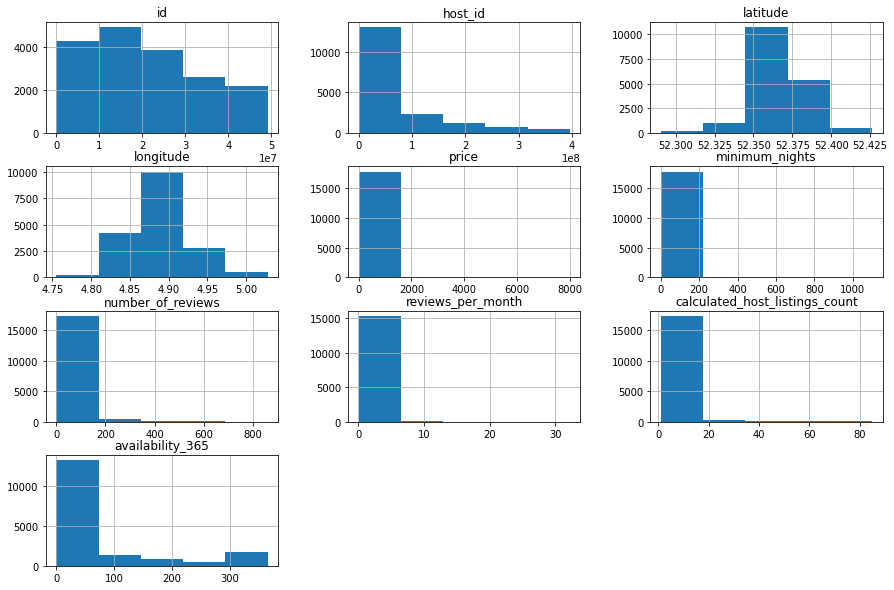

In [ ]:
# plotar o histograma das variáveis numéricas
df_clean.hist(bins=5,figsize=(15,10));

####Q.3.1 Verificando Outliers
Com os Histogramas foi possível verificar que existem `outliers` no nosso dataset. Em especial nas colunas `price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count`.
*texto em itálico*



In [ ]:
df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
count,17825.000000,17825.000000,17825.000000,15425.000000,17825.000000
mean,154.495877,3.867041,23.952875,0.562200,2.684376
std,154.162566,18.732039,54.831150,1.017706,8.813855
min,0.000000,1.000000,0.000000,0.010000,1.000000
25%,95.000000,2.000000,2.000000,0.120000,1.000000
50%,129.000000,2.000000,8.000000,0.260000,1.000000
75%,180.000000,3.000000,21.000000,0.540000,1.000000
max,8000.000000,1100.000000,860.000000,32.190000,85.000000


Algumas análises podem ser feitas com os dados acima.

A média de valores da coluna `price` é de 154.162 e 75% dos seus valores estão no valor de até 180.00 porém seu valor máximo chegou a 8000.00 

Mesma análise pode ser realizada na coluna `minimum_nights`, sua mediana é de 3.86 e 75% dos seus valores estão em até 3 diárias, mas seu valor máximo é de 1100, fazendo com que sua média distoe da mediana e chegue a 18.73. 

#####Q.3.1.1 Minimum Nights

minimum_nights: valores acima de 10:
496 entradas
2.78%
minimum_nights: valores acima de 15:
324 entradas
1.82%
minimum_nights: valores acima de 30:
95 entradas
0.53%
minimum_nights: valores acima de 40:
87 entradas
0.49%
minimum_nights: valores acima de 50:
78 entradas
0.44%


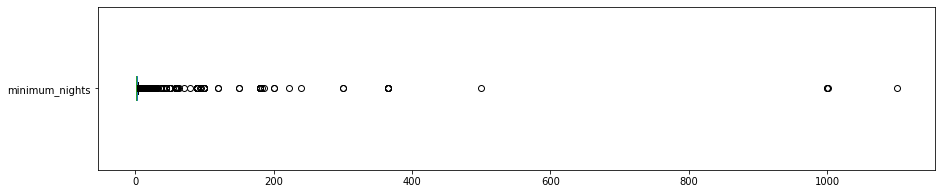

In [ ]:
#verificando outliers com Box_plot
#minimum_nights
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))

#ver quantidade de valores acima de 30 dias para minimum_nights
print('minimum_nights: valores acima de 10:')
print('{} entradas'.format(len(df_clean[df_clean.minimum_nights > 10])))
print('{:.2f}%'.format((len(df_clean[df_clean.minimum_nights > 10])/df_clean.shape[0])*100))
print('minimum_nights: valores acima de 15:')
print('{} entradas'.format(len(df_clean[df_clean.minimum_nights > 15])))
print('{:.2f}%'.format((len(df_clean[df_clean.minimum_nights > 15])/df_clean.shape[0])*100))
print('minimum_nights: valores acima de 30:')
print('{} entradas'.format(len(df_clean[df_clean.minimum_nights > 30])))
print('{:.2f}%'.format((len(df_clean[df_clean.minimum_nights > 30])/df_clean.shape[0])*100))
print('minimum_nights: valores acima de 40:')
print('{} entradas'.format(len(df_clean[df_clean.minimum_nights > 40])))
print('{:.2f}%'.format((len(df_clean[df_clean.minimum_nights > 40])/df_clean.shape[0])*100))
print('minimum_nights: valores acima de 50:')
print('{} entradas'.format(len(df_clean[df_clean.minimum_nights > 50])))
print('{:.2f}%'.format((len(df_clean[df_clean.minimum_nights > 50])/df_clean.shape[0])*100))

Como podemos ver, a quantidade de dados para *15 noites* ou mais representa um total de *324* entradas, que representa *1.82%* do nosso volume de dados. Para diminuir o nosso alcance total e melhorar a visualização do nosso histograma, vamos emilinar esses dados.


#####Q.3.1.2 Price

price: valores acima de 400:
414 entradas
2.32%
price: valores acima de 500:
195 entradas
1.09%
price: valores acima de 600:
118 entradas
0.66%
price: valores acima de 700:
95 entradas
0.53%
price: valores acima de 800:
61 entradas
0.34%


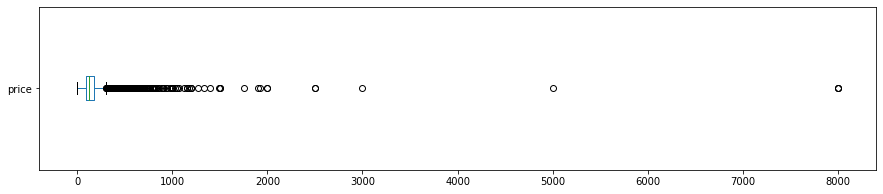

In [ ]:
#verificando outliers com Box_plot
#price
df_clean.price.plot(kind='box', vert=False, figsize=(15,3))

#ver quantidade de valores acima de $400 para price
print('price: valores acima de 400:')
print('{} entradas'.format(len(df_clean[df_clean.price > 400])))
print('{:.2f}%'.format((len(df_clean[df_clean.price > 400])/df_clean.shape[0])*100))
print('price: valores acima de 500:')
print('{} entradas'.format(len(df_clean[df_clean.price > 500])))
print('{:.2f}%'.format((len(df_clean[df_clean.price > 500])/df_clean.shape[0])*100))
print('price: valores acima de 600:')
print('{} entradas'.format(len(df_clean[df_clean.price > 600])))
print('{:.2f}%'.format((len(df_clean[df_clean.price > 600])/df_clean.shape[0])*100))
print('price: valores acima de 700:')
print('{} entradas'.format(len(df_clean[df_clean.price > 700])))
print('{:.2f}%'.format((len(df_clean[df_clean.price > 700])/df_clean.shape[0])*100))
print('price: valores acima de 800:')
print('{} entradas'.format(len(df_clean[df_clean.price > 800])))
print('{:.2f}%'.format((len(df_clean[df_clean.price > 800])/df_clean.shape[0])*100))

Como podemos ver, a quantidade de dados para *400$* ou mais representa um total 

---

de *414* entradas, que representa *2,32%* do nosso volume de dados. Para diminuir o nosso alcance total e melhorar a visualização do nosso histograma, vamos emilinar esses dados. Por coincidência os mesmos valores da análise anterior.


#####Q.3.1.3 number_of_reviews

number_of_reviews: valores acima de 200:
371 entradas
2.08%
number_of_reviews: valores acima de 250:
266 entradas
1.49%
number_of_reviews: valores acima de 300:
163 entradas
0.91%
number_of_reviews: valores acima de 300:
163 entradas
0.91%
number_of_reviews: valores acima de 350:
110 entradas
0.62%


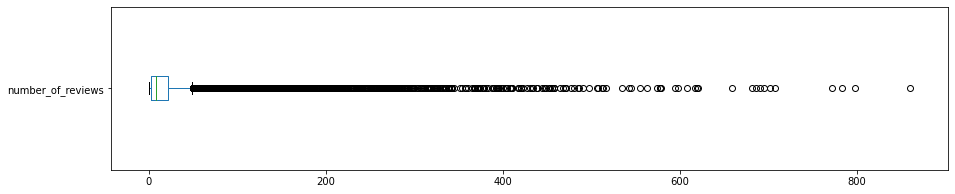

In [ ]:
#verificando outliers com Box_plot
#number_of_reviews
df_clean.number_of_reviews.plot(kind='box', vert=False, figsize=(15,3))

#ver quantidade de valores acima de 30 dias para number_of_reviews
print('number_of_reviews: valores acima de 200:')
print('{} entradas'.format(len(df_clean[df_clean.number_of_reviews > 200])))
print('{:.2f}%'.format((len(df_clean[df_clean.number_of_reviews > 200])/df_clean.shape[0])*100))
print('number_of_reviews: valores acima de 250:')
print('{} entradas'.format(len(df_clean[df_clean.number_of_reviews > 250])))
print('{:.2f}%'.format((len(df_clean[df_clean.number_of_reviews > 250])/df_clean.shape[0])*100))
print('number_of_reviews: valores acima de 300:')
print('{} entradas'.format(len(df_clean[df_clean.number_of_reviews > 300])))
print('{:.2f}%'.format((len(df_clean[df_clean.number_of_reviews > 300])/df_clean.shape[0])*100))
print('number_of_reviews: valores acima de 300:')
print('{} entradas'.format(len(df_clean[df_clean.number_of_reviews > 300])))
print('{:.2f}%'.format((len(df_clean[df_clean.number_of_reviews > 300])/df_clean.shape[0])*100))
print('number_of_reviews: valores acima de 350:')
print('{} entradas'.format(len(df_clean[df_clean.number_of_reviews > 350])))
print('{:.2f}%'.format((len(df_clean[df_clean.number_of_reviews > 350])/df_clean.shape[0])*100))

Como podemos ver, a quantidade de dados para *200 reviews* ou mais representa um total de *371* entradas, que representa *2.08%* do nosso volume de dados. Para diminuir o nosso alcance total e melhorar a visualização do nosso histograma, vamos emilinar esses dados. Por coincidência os mesmos valores da análise anterior.


#####Q.3.1.4 reviews_per_month

reviews_per_month: valores acima de 3:
570 entradas
3.20%
reviews_per_month: valores acima de 4:
283 entradas
1.59%
reviews_per_month: valores acima de 5:
134 entradas
0.75%
reviews_per_month: valores acima de 6:
62 entradas
0.35%
reviews_per_month: valores acima de 7:
32 entradas
0.18%


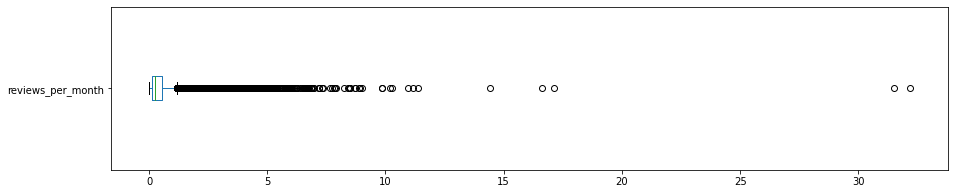

In [ ]:
#verificando outliers com Box_plot
#reviews_per_month
df_clean.reviews_per_month.plot(kind='box', vert=False, figsize=(15,3))

#ver quantidade de valores acima de 3 reviews_per_month
print('reviews_per_month: valores acima de 3:')
print('{} entradas'.format(len(df_clean[df_clean.reviews_per_month > 3])))
print('{:.2f}%'.format((len(df_clean[df_clean.reviews_per_month > 3])/df_clean.shape[0])*100))
print('reviews_per_month: valores acima de 4:')
print('{} entradas'.format(len(df_clean[df_clean.reviews_per_month > 4])))
print('{:.2f}%'.format((len(df_clean[df_clean.reviews_per_month > 4])/df_clean.shape[0])*100))
print('reviews_per_month: valores acima de 5:')
print('{} entradas'.format(len(df_clean[df_clean.reviews_per_month > 5])))
print('{:.2f}%'.format((len(df_clean[df_clean.reviews_per_month > 5])/df_clean.shape[0])*100))
print('reviews_per_month: valores acima de 6:')
print('{} entradas'.format(len(df_clean[df_clean.reviews_per_month > 6])))
print('{:.2f}%'.format((len(df_clean[df_clean.reviews_per_month > 6])/df_clean.shape[0])*100))
print('reviews_per_month: valores acima de 7:')
print('{} entradas'.format(len(df_clean[df_clean.reviews_per_month > 7])))
print('{:.2f}%'.format((len(df_clean[df_clean.reviews_per_month > 7])/df_clean.shape[0])*100))

Como podemos ver, a quantidade de dados para *3 reviews* ou mais representa um total de *570 entradas, que representa *3.20%* do nosso volume de dados. Para diminuir o nosso alcance total e melhorar a visualização do nosso histograma, vamos emilinar esses dados. Por coincidência os mesmos valores da análise anterior.


####Q.3.2 Normalizando Outliers
Já que identificamos *outliers* nas variáveis `minimum_nights`,`price`,`number_of_reviews`e `reviews_per_month` , vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

Com o objetivo de ajudar na normalização dos dados, e criar um critério para o filtro dentro das váriaveis, vou trabalhar com a hípotese de que estamos buscando um imóvel na cidade de Amsterda para um viagem de férias com os seguintes requisitos:

*   15 dias de estadia;
*   Até $300,00 de valor de estadia;
*   Ter pelo menos 200 reviews;
*   Ter pelo menos 3 review por mês.


Vamos verficar como ficará nosso *DataSet* e o histograma após a execução desse fitro.


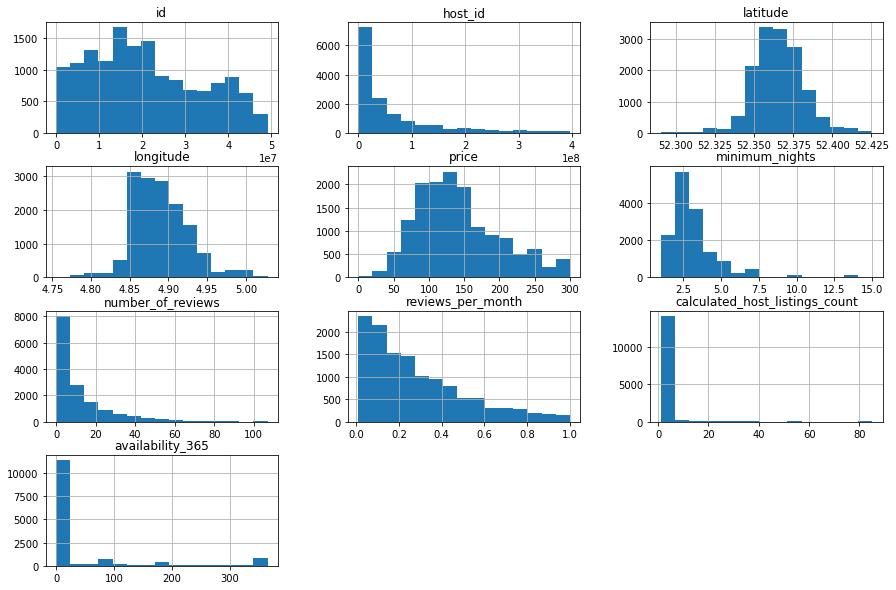

In [ ]:
# remover os *outliers* em um novo DataFrame
df_cleaned = df_clean.copy()
df_cleaned.drop(df_cleaned[df_cleaned.minimum_nights > 15].index, axis=0, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned.price > 300].index, axis=0, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned.number_of_reviews > 200].index, axis=0, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned.reviews_per_month > 1].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_cleaned.hist(bins=15, figsize=(15,10));

Agora vamos plotar novamente o histograma original para verificar a normalização dos dados.

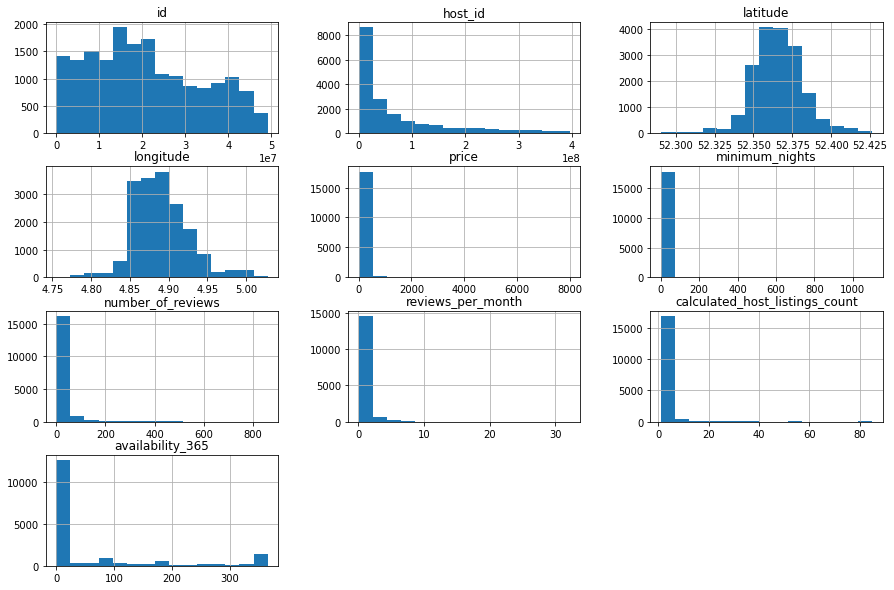

In [ ]:
# plotar o histograma das variáveis numéricas
df_clean.hist(bins=15,figsize=(15,10));

In [ ]:
limpeza=[df_cleaned.shape, df_clean.shape]
limpeza

[(14789, 15), (17825, 15)]

É possível notar que até após a execução as principais váriaveis do nosso estudo foram normalizadas, com picos e vales mais claros que melhoram a capacidade de análise do nosso *Dataset*. Com esse filtro foram retiradas 3036 entradas da nossa base de dados original.

### **Q4. Qual a correlação existente entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_cleaned[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
price,1.000000,0.023234,0.055670,0.041601,0.099126
minimum_nights,0.023234,1.000000,-0.040561,-0.096185,-0.007763
number_of_reviews,0.055670,-0.040561,1.000000,0.794438,0.112612
reviews_per_month,0.041601,-0.096185,0.794438,1.000000,0.197790
availability_365,0.099126,-0.007763,0.112612,0.197790,1.000000


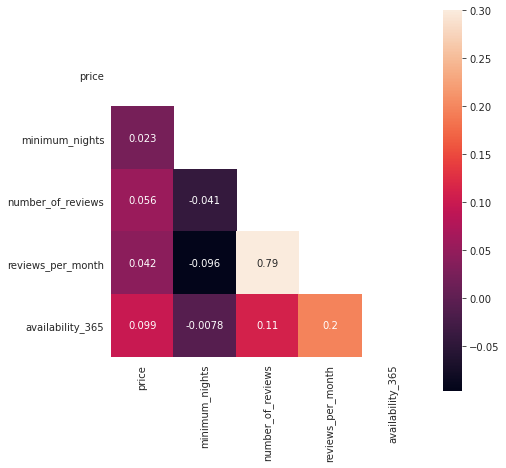

In [ ]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 7))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, linecolor='white', annot=True)


Verificando a tabela de correlação é possível notar que imóveis que:
* Quanto maior a disponibilidade durante o ano, maior o número de avaliações total e por mês, e que existe uma correlação possitiva entre ter maior disponibilidade e maior preço.
* Existe uma correlação positiva entre a quantidade de avaliações e o valor da diária
* Exite também uma correlação positiva entre a quantidade de noite mínimas e o preço das unidades

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_cleaned.room_type.value_counts()

Entire home/apt    12302
Private room        2388
Hotel room            68
Shared room           31
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.779579
Private room       0.210715
Hotel room         0.006957
Shared room        0.002749
Name: room_type, dtype: float64

O tipo de imóvel com mais opcões é o de Casa ou Apartamento completo, com 12.302 entradas, oque representa 78% da quantidade de imóveis de acordo com o filtro utilizado.

### **Q6. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights`
df_cleaned.minimum_nights.mean()

2.866590033132734

In [ ]:
# ver quais quantidades de dias mínimos são mais recorrentes
df_cleaned.minimum_nights.value_counts().sort_values(ascending=False)[:15]

2     5668
3     3685
1     2248
4     1341
5      871
7      450
6      224
14     113
10     101
8       30
12      16
15      16
9       13
13       9
11       4
Name: minimum_nights, dtype: int64

É possível notar que grande parte da nossa amostra se concentra entre 2 e 3 noites, pode ser levantada a hipóstese de que a cidade possui um grande fluxo de estadias de menor duração

### **Q7. Qual é a média do do valor para aluguel (price)?**


In [ ]:
# ver a média da coluna `price`
df_cleaned.price.mean()

139.38724727838257

In [ ]:
# ver qual o valor mais recorrente
df_cleaned.price.value_counts().sort_values(ascending=False)[:15]

150    904
100    744
120    621
200    559
125    468
110    396
250    394
90     386
130    354
80     350
140    324
175    299
99     285
95     281
180    269
Name: price, dtype: int64

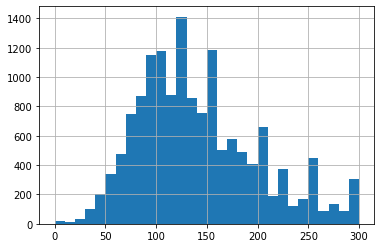

In [ ]:
df_cleaned.price.hist(bins=30);

De acordo com o valor máximo estabelecido de `300$` é possível verificar que o preço mais comum entres as unidades gira entre `100$` e `180$`

### **Q7. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_cleaned.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Centrum-West                157.494092
Centrum-Oost                156.135904
IJburg - Zeeburgereiland    150.217143
De Pijp - Rivierenbuurt     147.305352
Zuid                        144.372495
Westerpark                  140.179443
De Baarsjes - Oud-West      139.094942
Oud-Oost                    137.755382
Watergraafsmeer             137.614072
Noord-Oost                  136.441748
Name: price, dtype: float64

Como não conheço a cidade de Amsterdam acredito que seja interessante verificar onde estão localizadas as unidades disponíveis de acordo com o seu mapa.

*Mapar da Cidade de Amsterdam* 
<img alt="Amsterdam" width="100%" src='https://raw.githubusercontent.com/EricRaniere/Projetos-Estudos/main/DSNP/amsterdam.png'>


In [ ]:
# carregar imagem do mapa da cidade
ams_m = plt.imread('https://raw.githubusercontent.com/EricRaniere/Projetos-Estudos/main/DSNP/amsterdam.png')


In [ ]:
# para plotar um gráfico de dipersão sobre o mapa da cidade é necessário definir as latitudes e longitudes máximas.

BBox = ((df_cleaned.longitude.min(),   df_cleaned.longitude.max(),      
         df_cleaned.latitude.min(), df_cleaned.latitude.max()))

print(BBox)

(4.75493, 5.02799, 52.29034, 52.425340000000006)


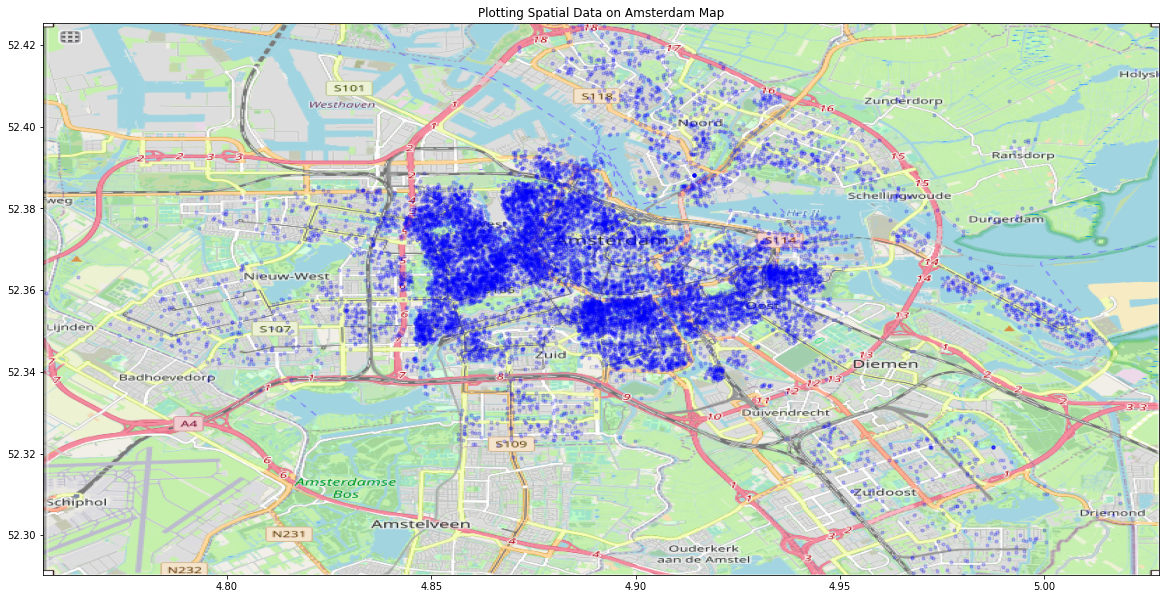

In [ ]:
#Para Plotar o gráfico no mapa
fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(df_cleaned.longitude, df_cleaned.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Amsterdam Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ams_m, zorder=0, extent = BBox, aspect= 'equal')

É possível notar que há uma grande concentração de imóveis no centro da cidade. e próximo aos canais fluviáis principais.

## Conclusões


O objetivo desse estudo foi de analisar os dados de um `DataSet`real e gerar uma análise de correlação entre as váriaveis e sobre a distribuição das unidades disponíveis na cidade, de acordo com a sua região.

Por ser uma primeira análise notei a dificuldade de realizar a limpeza dos dados, sem alterar de maneira incorreta o conjunto de dados. Para isso executei um filtro para diminuir `outliers` que teve como premissa as seguintes características:

*   15 dias de estadia;
*   Até $300,00 de valor de estadia;
*   Ter pelo menos 200 reviews;
*   Ter pelo menos 3 review por mês.

Com esse filtro foram retirados 3036 linhas de entrada da nossa base de dados, oque gerou uma normalização dos dados de maneira geral.

Acredito que para fim de demonstração esse filtro pode ser mais agressivo, até para melhorar a visualização do mapa, que mostrou uma grande concentração de unidades no centro da cidade, mas inviabilizou a leitura do mapa.

Chegamos a conclusão de que quanto mais próximo do centro mais caro é a estadia, mas que existe também uma grande quantidade de oferta nessa região, outra conclusão é a de que a grande maioria das estadias giram em torno de 1 a 4 dias no mínimo, para tando podemos levantar a hipótese de que essa seja a forma mais utilizada na cidades, tendo estadias mais curtas, girando mais rapidamente a quantidade de locações.

O preço das unidades também se mostrou muito concentrado na faixa entre `100$`e `180$`, esses valores permitem também um filtro mais agressivo.

### Novo Filtro
Em busca de uma visualização mais limpa, e de um número menor de resultados, vou realizar uma nova redução dos dados e gerar uma nova visualização no mapa.

O novo filtro seguirá os seguintes parâmetros:
* 3 dias de estadia;
* Até $150 de valor de estadia;
* Ter pelo menos 10 reviews;
* Ter pelo menos 1 review por mês.

A diferença entre os filtros foi de  9736 linhas
O Dataset agora possui  5053 linhas


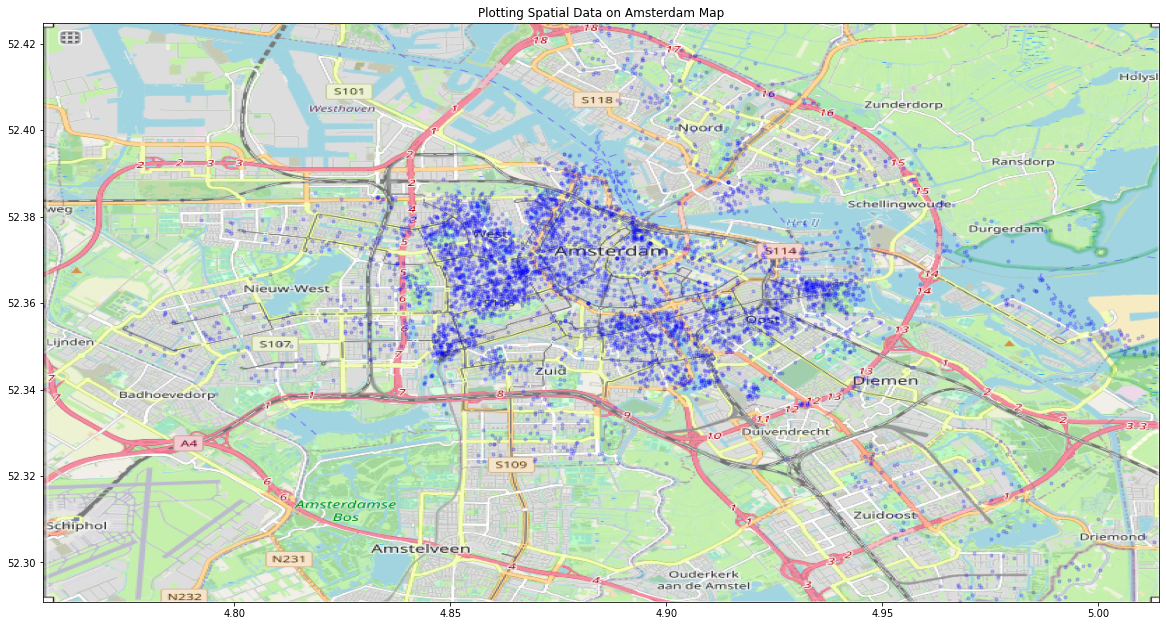

In [ ]:
# Gerando novo filtro
df_filtro = df_cleaned.copy()

# Realizando nova subtração de dados
df_filtro.drop(df_filtro[df_filtro.minimum_nights > 3].index, axis=0, inplace=True)
df_filtro.drop(df_filtro[df_filtro.price > 150].index, axis=0, inplace=True)
df_filtro.drop(df_filtro[df_filtro.number_of_reviews > 10].index, axis=0, inplace=True)
df_filtro.drop(df_filtro[df_filtro.reviews_per_month > 1].index, axis=0, inplace=True)

# Para plotar um gráfico de dipersão sobre o mapa da cidade é necessário definir as latitudes e longitudes máximas.
BBox = ((df_filtro.longitude.min(),   df_filtro.longitude.max(),      
         df_filtro.latitude.min(), df_filtro.latitude.max()))

# Verificar a diferença entre os dataset
filtrado = df_cleaned.shape[0] - df_filtro.shape[0]
print("A diferença entre os filtros foi de ",filtrado, "linhas")
print("O Dataset agora possui ",df_filtro.shape[0],"linhas")

# Para plotar o gráfico de dispersão sobre o mapa.
fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(df_filtro.longitude, df_filtro.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Amsterdam Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ams_m, zorder=0, extent = BBox, aspect= 'equal');

Quanto maior for menor for a quantidade de unidades melhor será a visualização no mapa, dessa forma já é possível ver os bairros com a maior quantidade de opções de locação pelo Airbnb em Amsterdam, com destaque do Centro Oeste com uma mancha mais densa no nosso mapa.

